****DATA DESCRIPTION****

This dataset provides a detailed overview of various demographic, behavioral, and taste‑related factors influencing **KFC customers’ fried chicken preferences**. It captures customer profiles, purchase habits, and flavor choices, enabling the prediction of the **Preferred Chicken** type for each individual. The goal is to help KFC better understand its audience and tailor menu offerings, promotions, and experiences to match customer expectations.

**Dataset:** Survey‑based dataset for KFC Fried Chicken Preference Prediction ( Synthetic Dataset )

**age:** Age of the customer (in years).

**price:** Typical amount spent per fried chicken purchase (in ₹).

**spicy_tolerance:** Level of comfort with spicy food (Low, Medium, High).

**Sweetness_Pref:** Level of comfort with sweet food (Low, Medium, High).

**Crunchiness_Pref:** Level of comfort with Cruchiness food (Low, Medium, High).

**preferred_chicken (Target Variable):** The chosen fried chicken style (e.g., Hot & Spicy, Original, Grilled) that the model aims to predict.

**Step 1:Import Necessary Libraries**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [108]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings 
# warnings.filterwarnings('ignore')
# from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
# from sklearn.model_selection import train_test_split

# # Classification algorithms
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier

# #scaling
# from sklearn.preprocessing import StandardScaler

# #metricse
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# #Hyperparameter tuning
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# #Dumping
# import joblib

**Step 2:Load the Dataset**

In [109]:
data= pd.read_csv("kfc_flavor_dataset.xls")
data

,Unnamed: 0,Age,Gender,Income,Location,Visit_Freq,Avg_Spend,Spicy_Tolerance,Sweetness_Pref,Crunchiness_Pref,Flavor
0,0,47,Female,29559.0,Rural,3,703,Medium,Low,Medium,Original
1,1,49,Male,88596.0,Rural,7,866,Low,Medium,High,Original
2,2,39,Female,56742.0,Rural,12,617,Medium,High,High,Original
3,3,57,Male,48130.0,Rural,9,364,Medium,High,Low,Original
4,4,50,Female,36696.0,Urban,1,558,Medium,High,High,Original
...,...,...,...,...,...,...,...,...,...,...,...
14275,14275,39,Male,NaN,Rural,11,501,Low,Medium,Medium,Original
14276,14276,41,Female,72400.0,Urban,8,658,Medium,Medium,Low,Original
14277,14277,22,Female,60278.0,Rural,10,827,Medium,Low,Medium,Extra Crispy
14278,14278,23,Male,47786.0,Urban,12,838,High,Low,Low,Spicy


**Step 3:Understand the Data** (Preprocessing + EDA)

In [110]:
data.head()

,Unnamed: 0,Age,Gender,Income,Location,Visit_Freq,Avg_Spend,Spicy_Tolerance,Sweetness_Pref,Crunchiness_Pref,Flavor
0,0,47,Female,29559.0,Rural,3,703,Medium,Low,Medium,Original
1,1,49,Male,88596.0,Rural,7,866,Low,Medium,High,Original
2,2,39,Female,56742.0,Rural,12,617,Medium,High,High,Original
3,3,57,Male,48130.0,Rural,9,364,Medium,High,Low,Original
4,4,50,Female,36696.0,Urban,1,558,Medium,High,High,Original


In [111]:
data.tail()

,Unnamed: 0,Age,Gender,Income,Location,Visit_Freq,Avg_Spend,Spicy_Tolerance,Sweetness_Pref,Crunchiness_Pref,Flavor
14275,14275,39,Male,NaN,Rural,11,501,Low,Medium,Medium,Original
14276,14276,41,Female,72400.0,Urban,8,658,Medium,Medium,Low,Original
14277,14277,22,Female,60278.0,Rural,10,827,Medium,Low,Medium,Extra Crispy
14278,14278,23,Male,47786.0,Urban,12,838,High,Low,Low,Spicy
14279,14279,26,Female,64802.0,Rural,6,711,Low,Medium,Low,Original


In [112]:
data.shape

(14280, 11)

In [113]:
data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Income', 'Location', 'Visit_Freq',
       'Avg_Spend', 'Spicy_Tolerance', 'Sweetness_Pref', 'Crunchiness_Pref',
       'Flavor'],
      dtype='object')

In [114]:
data.dtypes

Unnamed: 0            int64
Age                   int64
Gender               object
Income              float64
Location             object
Visit_Freq            int64
Avg_Spend             int64
Spicy_Tolerance      object
Sweetness_Pref       object
Crunchiness_Pref     object
Flavor               object
dtype: object

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14280 non-null  int64  
 1   Age               14280 non-null  int64  
 2   Gender            14280 non-null  object 
 3   Income            13564 non-null  float64
 4   Location          14280 non-null  object 
 5   Visit_Freq        14280 non-null  int64  
 6   Avg_Spend         14280 non-null  int64  
 7   Spicy_Tolerance   14280 non-null  object 
 8   Sweetness_Pref    13570 non-null  object 
 9   Crunchiness_Pref  13565 non-null  object 
 10  Flavor            14280 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.2+ MB


In [116]:
data.isna().sum()

Unnamed: 0            0
Age                   0
Gender                0
Income              716
Location              0
Visit_Freq            0
Avg_Spend             0
Spicy_Tolerance       0
Sweetness_Pref      710
Crunchiness_Pref    715
Flavor                0
dtype: int64

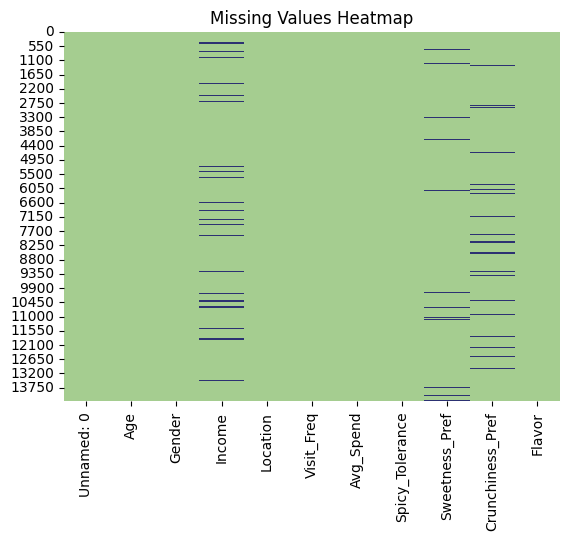

In [117]:
sns.heatmap(data.isnull(), cmap='crest', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [118]:
#    FILLING NULL VALUES

# INCOME
data['Income'] = data['Income'].fillna(data['Income'].median()).astype(int)

# SWEETNESS PREF
data.loc[data['Sweetness_Pref'].isna() & (data['Flavor'] == 'BBQ'), 'Sweetness_Pref'] = 'High'
data.loc[data['Sweetness_Pref'].isna() & (data['Flavor'].isin(['Original', 'Extra Crispy'])), 'Sweetness_Pref'] = 'Medium'
data.loc[data['Sweetness_Pref'].isna() & (data['Flavor'].isin(['Spicy', 'Zinger'])), 'Sweetness_Pref'] = 'Low'

#CRUNCHINESS PREF
data.loc[data['Crunchiness_Pref'].isna() & (data['Flavor'] == 'Extra Crispy'), 'Crunchiness_Pref'] = 'High'
data.loc[data['Crunchiness_Pref'].isna() & (data['Flavor'].isin(['Spicy', 'Zinger'])), 'Crunchiness_Pref'] = 'Medium'
data.loc[data['Crunchiness_Pref'].isna() & (data['Flavor'].isin(['Original', 'BBQ'])), 'Crunchiness_Pref'] = 'Low'


In [119]:
data.isna().sum()

Unnamed: 0          0
Age                 0
Gender              0
Income              0
Location            0
Visit_Freq          0
Avg_Spend           0
Spicy_Tolerance     0
Sweetness_Pref      0
Crunchiness_Pref    0
Flavor              0
dtype: int64

In [120]:
# DROPING UNWANTED COLUMNS
data.drop(['Unnamed: 0',"Income","Visit_Freq","Location","Gender"],axis=1,inplace=True)

In [121]:
data.duplicated().sum()

np.int64(422)

In [122]:
data.drop_duplicates(inplace=True)

In [123]:
data.describe()

,Age,Avg_Spend
count,13858.000000,13858.000000
mean,38.527637,654.808558
std,12.006379,226.193166
min,18.000000,300.000000
25%,28.000000,479.000000
50%,39.000000,647.000000
75%,49.000000,821.750000
max,59.000000,2988.000000


In [124]:
data['Flavor'].value_counts()

Flavor
Original        7361
Spicy           4156
Extra Crispy    1999
BBQ              202
Zinger           140
Name: count, dtype: int64

In [125]:
data.describe(include='object')

,Spicy_Tolerance,Sweetness_Pref,Crunchiness_Pref,Flavor
count,13858,13858,13858,13858
unique,3,3,3,5
top,Medium,Medium,Medium,Original
freq,5419,5685,5442,7361


In [126]:
# data.to_excel('select_dtype.xlsx',index=False)

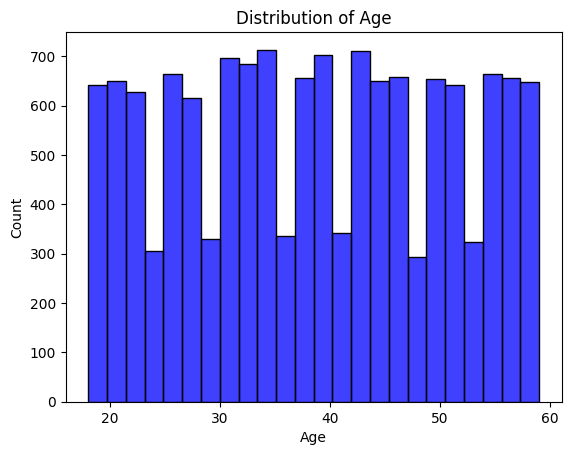

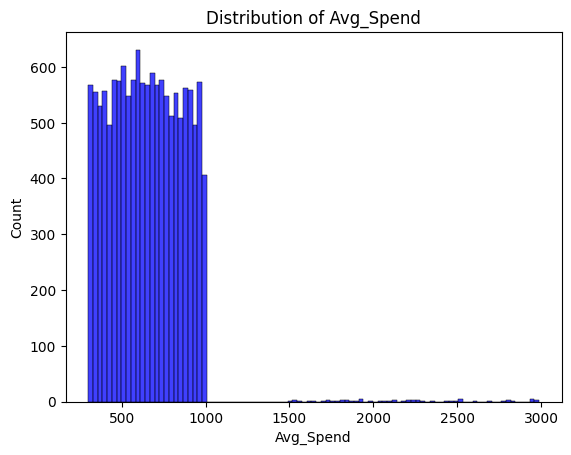

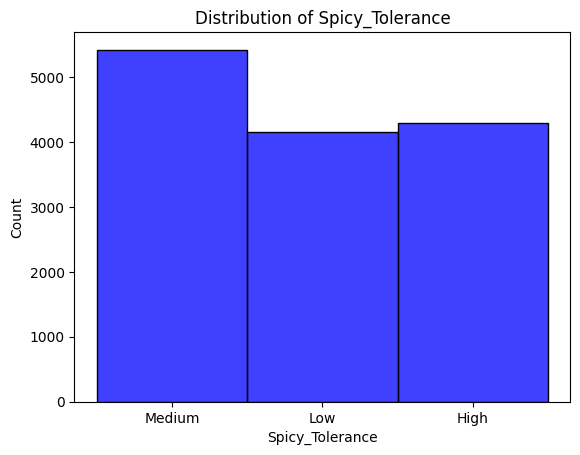

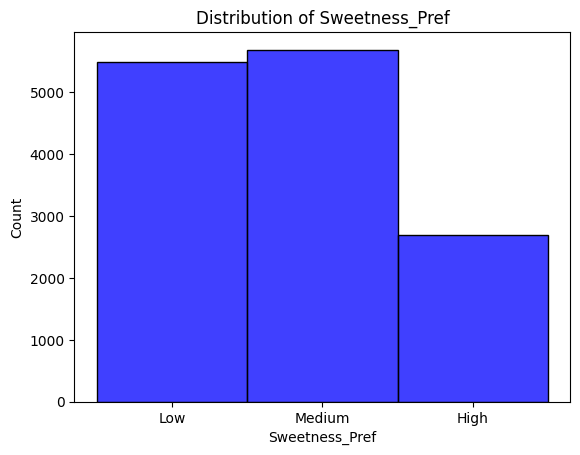

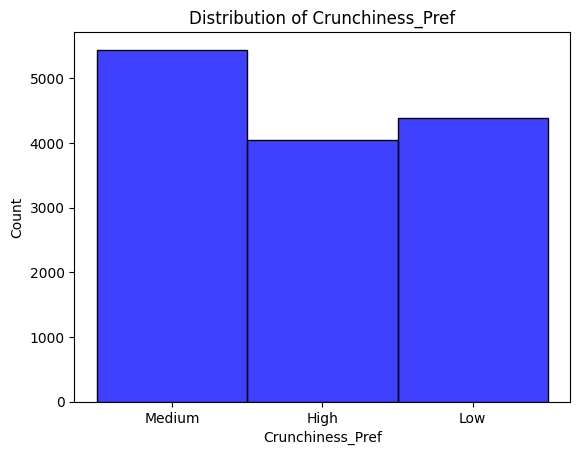

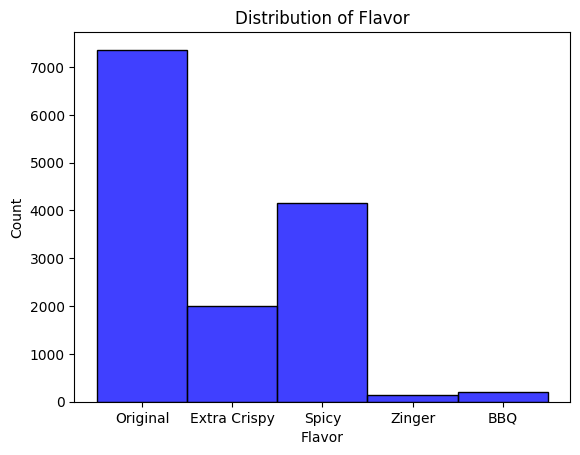

In [127]:
num_col=data.select_dtypes(include=['int64','float64','object'])
for col in num_col:
  sns.histplot(data[col],color='blue')
  plt.title(f'Distribution of {col}')   
  plt.show()

In [129]:
# print("Gender",data['Gender'].value_counts())
# print("Location",data['Location'].value_counts())
print("Flavor",data['Flavor'].value_counts())

Flavor Flavor
Original        7361
Spicy           4156
Extra Crispy    1999
BBQ              202
Zinger           140
Name: count, dtype: int64


In [130]:
# print("Gender",data['Gender'].value_counts())
# print("Location",data['Location'].value_counts())
print("Flavor",data['Flavor'].value_counts())

Flavor Flavor
Original        7361
Spicy           4156
Extra Crispy    1999
BBQ              202
Zinger           140
Name: count, dtype: int64


**Encodings**

Three Manual Encode \
Three Ordinal Encode

In [131]:
le=LabelEncoder()
me2={'Female':0,'Male':1}
me3={'Rural':0,'Urban':1}
oe1=OrdinalEncoder()
oe2=OrdinalEncoder()
oe3=OrdinalEncoder()

#Label
data['Flavor']=le.fit_transform(data['Flavor'])


# manual
# data['Gender']=data['Gender'].map(me2)
# data['Location']=data['Location'].map(me3)


data["Spicy_Tolerance"]=oe1.fit_transform(data[["Spicy_Tolerance"]])
data["Sweetness_Pref"]=oe2.fit_transform(data[["Sweetness_Pref"]])
data["Crunchiness_Pref"]=oe3.fit_transform(data[["Crunchiness_Pref"]])
data

,Age,Avg_Spend,Spicy_Tolerance,Sweetness_Pref,Crunchiness_Pref,Flavor
0,47,703,2.0,1.0,2.0,2
1,49,866,1.0,2.0,0.0,2
2,39,617,2.0,0.0,0.0,2
3,57,364,2.0,0.0,1.0,2
4,50,558,2.0,0.0,0.0,2
...,...,...,...,...,...,...
14275,39,501,1.0,2.0,2.0,2
14276,41,658,2.0,2.0,1.0,2
14277,22,827,2.0,1.0,2.0,1
14278,23,838,0.0,1.0,1.0,3


In [132]:
# oe1=OrdinalEncoder()
# oe2=OrdinalEncoder()
# oe3=OrdinalEncoder()
# data["Spicy_Tolerance"]=oe1.fit_transform(data[["Spicy_Tolerance"]])
# data["Sweetness_Pref"]=oe2.fit_transform(data[["Sweetness_Pref"]])
# data["Crunchiness_Pref"]=oe3.fit_transform(data[["Crunchiness_Pref"]])
# data

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13858 entries, 0 to 14279
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               13858 non-null  int64  
 1   Avg_Spend         13858 non-null  int64  
 2   Spicy_Tolerance   13858 non-null  float64
 3   Sweetness_Pref    13858 non-null  float64
 4   Crunchiness_Pref  13858 non-null  float64
 5   Flavor            13858 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 757.9 KB


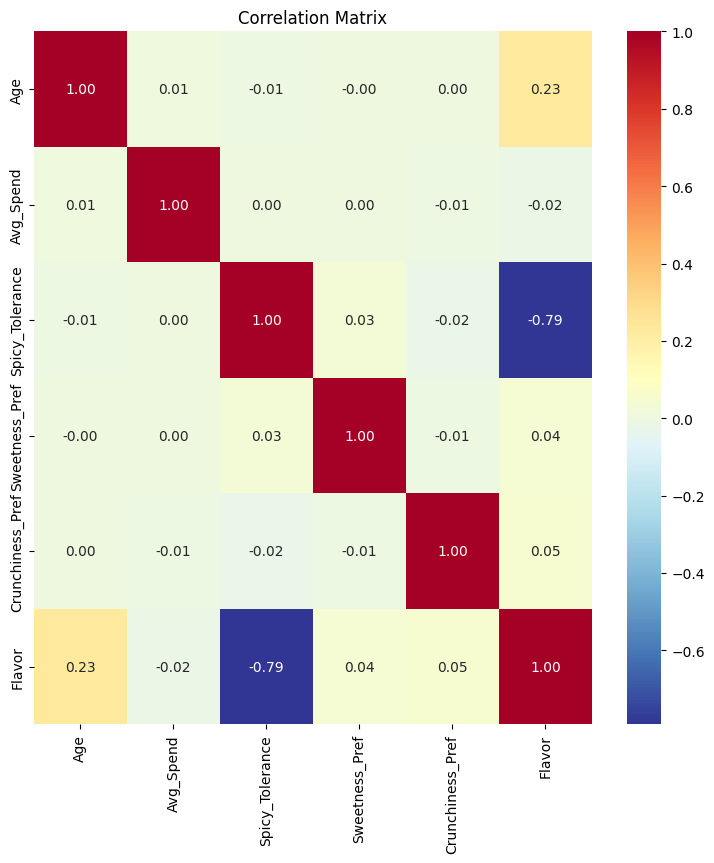

In [134]:
correlation=data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cmap='RdYlBu_r',annot=True,fmt='0.2f',robust=True)
plt.title("Correlation Matrix")
plt.show()

**Strongest Correlations with Flavor (Target Variable)**

**Age** → Weak positive correlation. As age increases, there’s a slight tendency toward certain flavors.

**Avg_Spend** → Essentially no correlation. Spending habits don’t align with flavor preference.

**Spicy_Tolerance** → Strong negative correlation. Higher spice tolerance is strongly linked to lower‑encoded flavors.

**Sweetness_Pref** → Very Weak positive correlation. Sweetness preference doesn’t strongly align with flavor choice.

**Crunchiness_Pref** → Very Weak positive correlation. Crunchiness preference has little effect on flavor choice

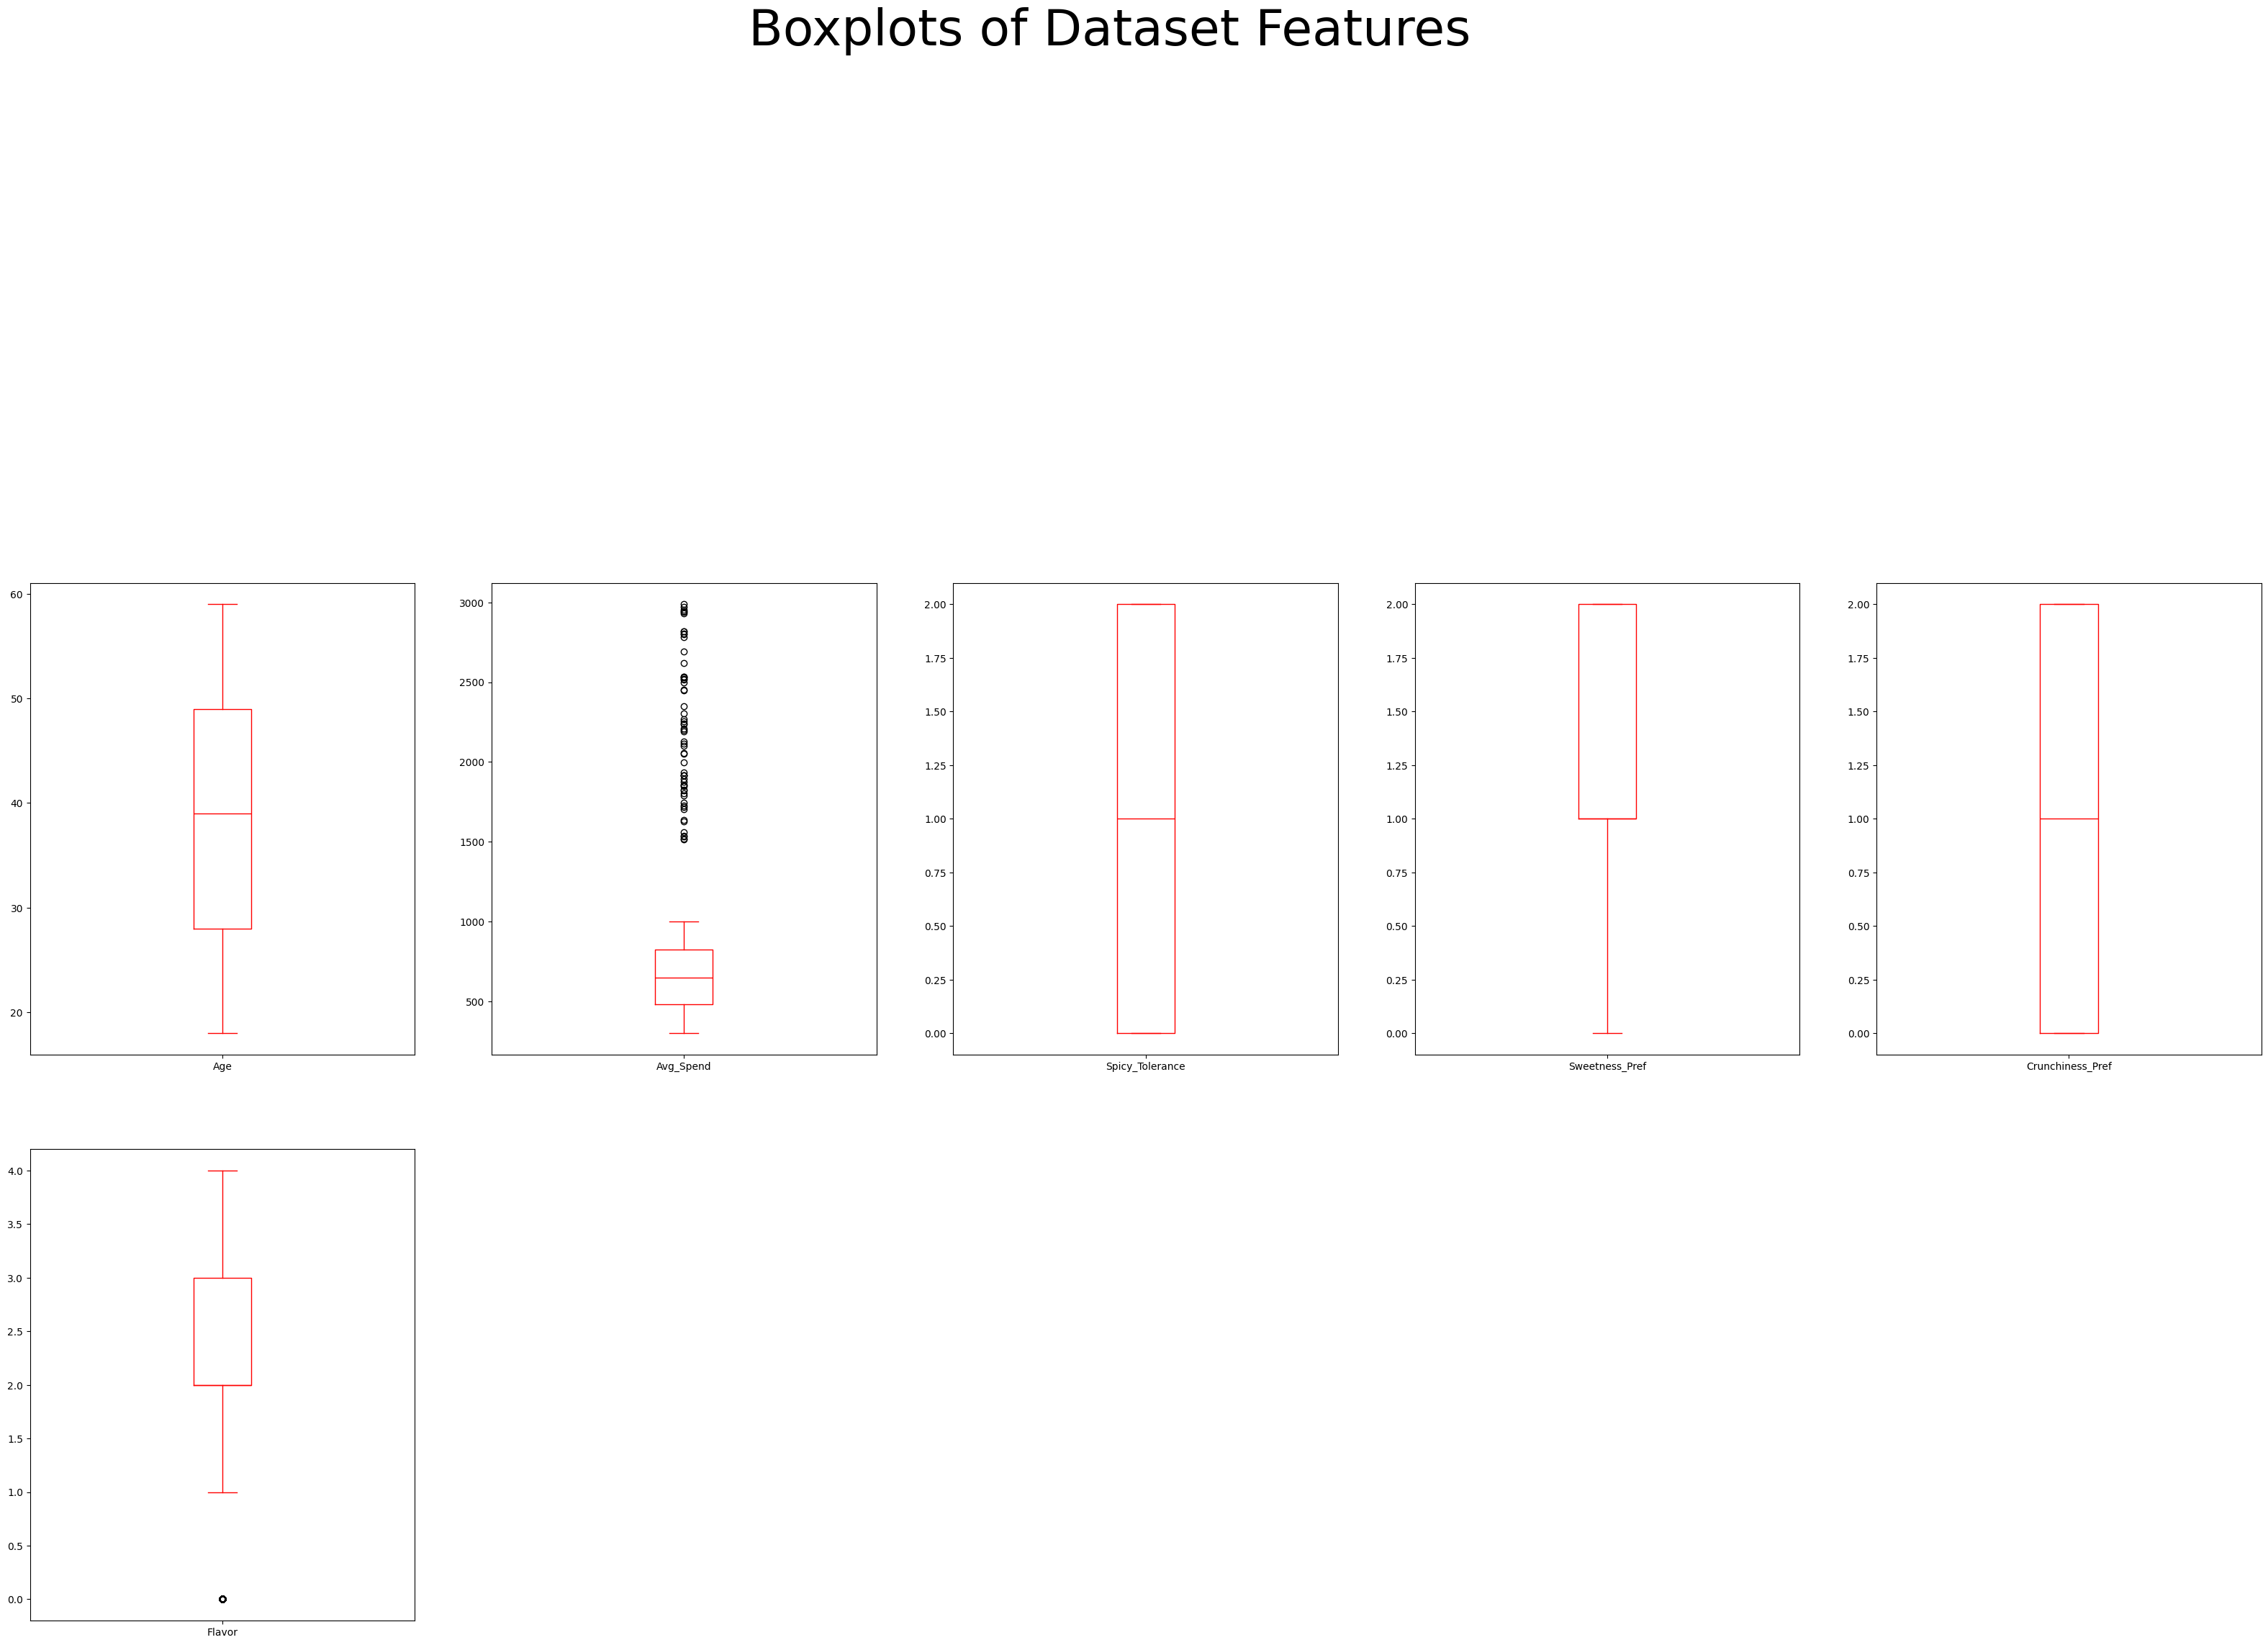

In [135]:
data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(40, 80), color='red')
plt.suptitle('Boxplots of Dataset Features', fontsize=50)
plt.show()

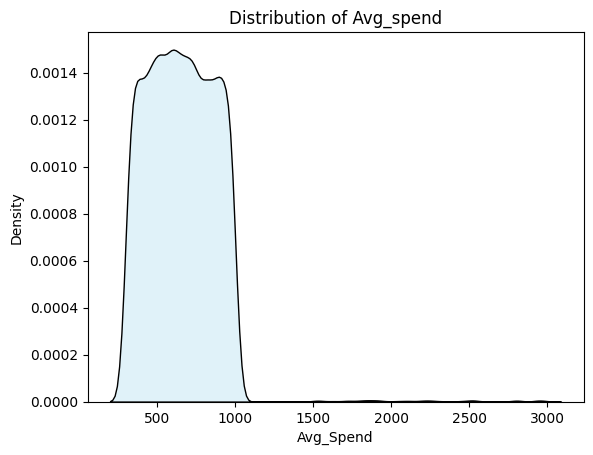

In [136]:
sns.kdeplot(data['Avg_Spend'],fill=True,color="skyblue",edgecolor="black")
plt.title("Distribution of Avg_spend")
plt.show()

In [137]:
original_data=data.copy()

# removing outliers
q1 =data['Avg_Spend'].quantile(0.25)
q3 =data['Avg_Spend'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q1+1.5*iqr
data=data[(data['Avg_Spend']>=lower)&(data['Avg_Spend']<=upper)]

print(f'Original shape : {original_data.shape}')
print(f'After Removing Outliers : {data.shape}')
print(f'Rows Removed : {original_data.shape[0]-data.shape[0]}')


Original shape : (13858, 6)
After Removing Outliers : (13671, 6)
Rows Removed : 187


**Checking "Avg_Spend" Box plot After Remove Outliers**

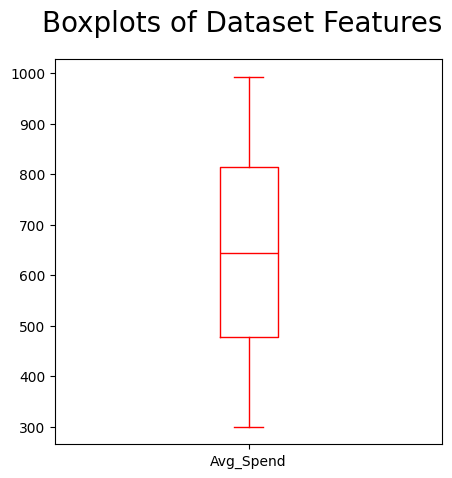

In [138]:
data['Avg_Spend'].plot(kind='box',  layout=(1, 0), figsize=(5, 5), color='red')
plt.suptitle('Boxplots of Dataset Features', fontsize=20)
plt.show()

In [139]:
x=data.drop('Flavor',axis=1)
y=data['Flavor']

**Step 4 : Spliting Data**

In [140]:
x

,Age,Avg_Spend,Spicy_Tolerance,Sweetness_Pref,Crunchiness_Pref
0,47,703,2.0,1.0,2.0
1,49,866,1.0,2.0,0.0
2,39,617,2.0,0.0,0.0
3,57,364,2.0,0.0,1.0
4,50,558,2.0,0.0,0.0
...,...,...,...,...,...
14275,39,501,1.0,2.0,2.0
14276,41,658,2.0,2.0,1.0
14277,22,827,2.0,1.0,2.0
14278,23,838,0.0,1.0,1.0


In [141]:
y

0        2
1        2
2        2
3        2
4        2
        ..
14275    2
14276    2
14277    1
14278    3
14279    2
Name: Flavor, Length: 13671, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [144]:
print('x_train_shape',x_train.shape)
print('x_test_shape',x_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

x_train_shape (10936, 5)
x_test_shape (2735, 5)
y_train_shape (10936,)
y_test_shape (2735,)


In [145]:
count=y_train.value_counts()
count

Flavor
2    5809
3    3294
1    1564
0     156
4     113
Name: count, dtype: int64

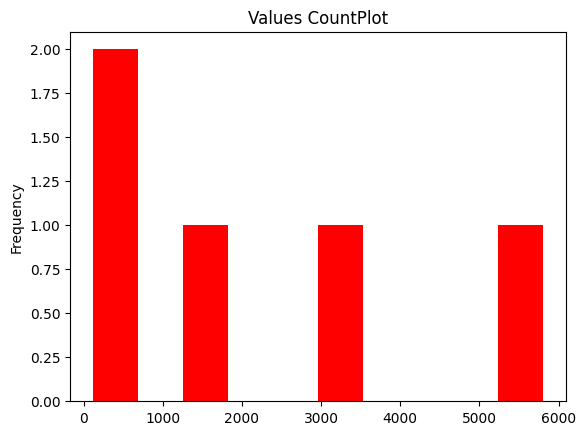

In [146]:
count.plot(kind='hist',color='red')
plt.title("Values CountPlot")
plt.show()

In [147]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

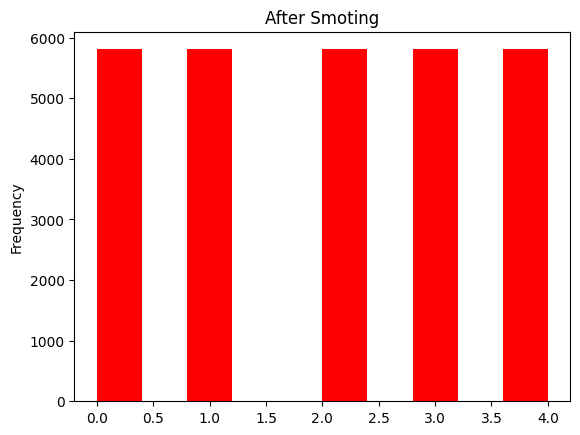

In [148]:
y_train.plot(kind='hist',color='red')
plt.title("After Smoting")
plt.show()

**Step 5 : Checking Best Model**

In [149]:
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


models = {
"Logistic Regression": LogisticRegression(max_iter=1000),
 "Decision Tree": DecisionTreeClassifier(),
 "Random Forest": RandomForestClassifier(),
 "Gradient Boosting": GradientBoostingClassifier(),
 "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
}


In [150]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# def evaluate_classification(model, x_test, y_test, y_pred):
#     acc = accuracy_score(y_test, y_pred)
#     prec = precision_score(y_test, y_pred, average="weighted")
#     rec = recall_score(y_test, y_pred, average="weighted")
#     f1 = f1_score(y_test, y_pred, average="weighted")
#     return acc, prec, rec, f1

# # Scaler the features
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# results = {}

# for name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
    
#     acc, prec, rec, f1 = evaluate_classification(model, x_test, y_test, y_pred)
#     results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

# # Display results
# for model_name, metrics in results.items():
#     results={(f"{model_name} --> Accuracy: {metrics['Accuracy']:.2f}, "
#           f"Precision: {metrics['Precision']:.2f}, Recall: {metrics['Recall']:.2f}, "
#           f"F1: {metrics['F1']:.2f}")}

# result=pd.DataFrame(results).T.sort_values(by="Accuracy",ascending=False)
# print(result)



In [151]:
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# results = {}

# for name, model in models.items():
#     model.fit(x_train_scaled, y_train)
#     y_pred = model.predict(x_test_scaled)
    
#     acc, prec, rec, f1 = evaluate_classification(model, x_test_scaled, y_test, y_pred)
#     results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

# # Display results
# for model_name, metrics in results.items():
#     print(f"{model_name} --> Accuracy: {metrics['Accuracy']:.2f}, "
#           f"Precision: {metrics['Precision']:.2f}, Recall: {metrics['Recall']:.2f}, "
#           f"F1: {metrics['F1']:.2f}")


In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define models that require scaling
scale_sensitive_models = ["LogisticRegression", "SVC", "KNeighborsClassifier"]

def evaluate_classification(model, x_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    return acc, prec, rec, f1

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

results = {}

# Train and evaluate models
for name, model in models.items():
    
     # Fit and predict with appropriate data
    if name in scale_sensitive_models:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
    acc, prec, rec, f1 = evaluate_classification(model, x_test, y_test, y_pred)
    results[name] = {
        "Accuracy": round(acc, 3), # for only 3 decimal points
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3)
    }

# Convert results dict to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)

print(results_df)


                        Accuracy  Precision  Recall     F1
Random Forest              0.956      0.961   0.956  0.958
XGBoost                    0.954      0.959   0.954  0.956
Gradient Boosting          0.952      0.963   0.952  0.955
Decision Tree              0.950      0.952   0.950  0.950
Logistic Regression        0.822      0.929   0.822  0.859
Naive Bayes                0.778      0.909   0.778  0.805
K-Nearest Neighbors        0.548      0.658   0.548  0.587
AdaBoost                   0.541      0.405   0.541  0.460
Support Vector Machine     0.390      0.572   0.390  0.411


In [ ]:
results_df

**Key Points (Accuracy %):**

**Gradient Boosting & XGBoost** → 99.9% accuracy, precision, recall, F1.

**Random Forest & Decision Tree** → 99.7%-99.8% accuracy, very strong and stable.

**Logistic Regression** → 89.2% accuracy, good baseline but misses complex patterns.

**Naive Bayes** → 82% accuracy, high precision (92.0%) but weaker recall.


**KNN** → 54.6% accuracy, struggles with scaling and high dimensions.
**AdaBoost** → 41.2% accuracy, less robust than boosting methods.

**SVM** → 36.9% accuracy, very low precision (27.4%), heavy misclassification.

**Takeaway:** Deploy **Gradient Boosting or XGBoost** (≈100% accuracy) for production — they deliver the most reliable, business‑ready predictions.

In [153]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Initialize Gradient Boosting Classifier
# gbc = GradientBoostingClassifier(random_state=42)

# # Define hyperparameter grid (similar to regressor, but no max_depth directly — use max_depth inside base_estimator if needed)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 4, 5],          # works in sklearn >=1.0
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Setup GridSearchCV for classification
# grid_search = GridSearchCV(
#     estimator=gbc,
#     param_grid=param_grid,
#     scoring='accuracy',   # classification metric
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit on training data
# grid_search.fit(x_train, y_train)

# # Best parameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Predict on test set
# y_pred = grid_search.predict(x_test)

# # Evaluate the model with classification metrics
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred, average="weighted")
# rec = recall_score(y_test, y_pred, average="weighted")
# f1 = f1_score(y_test, y_pred, average="weighted")

# print(f"Gradient Boosting Classifier (Tuned) --> "
#       f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")


**Hyperparameter Tuning on GradientBoostingClassifier**
based on RandomizedSearchCV 

In [154]:
# from sklearn.model_selection import RandomizedSearchCV

# gbc = GradientBoostingClassifier(random_state=42)

# param_dist = {
#     'n_estimators': np.arange(50, 500, 50),
#     'learning_rate': np.linspace(0.01, 0.2, 10),
#     'max_depth': [3, 4, 5, 6],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# random_search = RandomizedSearchCV(
#     estimator=gbc,
#     param_distributions=param_dist,
#     n_iter=30,              # only try 30 random combos
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# random_search.fit(x_train, y_train)
# print("Best Hyperparameters:", random_search.best_params_)


In [155]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the base XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',   # for multiclass classification
    num_class=len(np.unique(y_train)),  # number of classes
    eval_metric='mlogloss',      # multiclass log loss
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Define hyperparameter search space
param_dist = {
    'n_estimators': np.arange(50, 500, 50),       # number of boosting rounds
    'learning_rate': np.linspace(0.01, 0.2, 10),  # shrinkage step size
    'max_depth': [3, 4, 5, 6],                    # tree depth
    'subsample': [0.6, 0.8, 1.0],                 # row sampling
    'colsample_bytree': [0.6, 0.8, 1.0],          # feature sampling
    'gamma': [0, 0.1, 0.2, 0.5],                  # min loss reduction
    'reg_alpha': [0, 0.01, 0.1, 1],               # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]                  # L2 regularization
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,              # try 30 random combos
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 3, 'reg_alpha': 0.1, 'n_estimators': np.int64(450), 'max_depth': 6, 'learning_rate': np.float64(0.09444444444444444), 'gamma': 0, 'colsample_bytree': 1.0}
Test Accuracy: 0.9517367458866545

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.82      0.59        39
           1       0.91      0.93      0.92       412
           2       0.97      0.95      0.96      1452
           3       0.99      0.99      0.99       805
           4       0.59      0.63      0.61        27

    accuracy                           0.95      2735
   macro avg       0.78      0.86      0.81      2735
weighted avg       0.96      0.95      0.95      2735



In [156]:
best_model = random_search.best_estimator_
print(best_model)
y_pred = best_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"RandomizedSearchCV Based Tuned LogisticRegression --> Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.09444444444444444), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(450), n_jobs=-1,
              num_class=5, ...)
RandomizedSearchCV Based Tuned LogisticRegression --> Accuracy: 0.952, Precision: 0.958, Recall: 0.952, F1: 0.954


In [157]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Base model
# log_reg = LogisticRegression(random_state=42, max_iter=500)

# # Parameter grid for Logistic Regression
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': np.logspace(-3, 3, 7),   # fewer values than RandomizedSearch to keep it manageable
#     'solver': ['liblinear', 'saga'],
#     'l1_ratio': [0, 0.5, 1]       # only relevant for elasticnet
# }

# # Grid search
# grid_search = GridSearchCV(
#     estimator=log_reg,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit
# grid_search.fit(x_train_scaled, y_train)

# # Best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)


In [158]:
# best_model_searchCV = grid_search.best_estimator_
# print(best_model_searchCV)
# y_pred = best_model_searchCV.predict(x_test_scaled)

# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred, average="weighted")
# rec = recall_score(y_test, y_pred, average="weighted")
# f1 = f1_score(y_test, y_pred, average="weighted")

# print(f"GridSearchCV Based Tuned LogisticRegression --> Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

In [159]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Base model
# log_reg = LogisticRegression(random_state=42, max_iter=500)

# # Parameter distribution for Logistic Regression
# param_dist = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': np.logspace(-3, 3, 10),   # from 0.001 to 1000
#     'solver': ['liblinear', 'saga'],  # solvers that support l1/elasticnet
#     'l1_ratio': np.linspace(0, 1, 5)  # only used if penalty='elasticnet'
# }

# # Randomized search
# random_search = RandomizedSearchCV(
#     estimator=log_reg,
#     param_distributions=param_dist,
#     n_iter=30,              # try 30 random combos
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# # Fit
# random_search.fit(x_train_scaled, y_train)

# # Best hyperparameters
# print("Best Hyperparameters:", random_search.best_params_)


In [160]:
# best_model = random_search.best_estimator_
# print(best_model)
# y_pred = best_model.predict(x_test_scaled)

# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred, average="weighted")
# rec = recall_score(y_test, y_pred, average="weighted")
# f1 = f1_score(y_test, y_pred, average="weighted")

# print(f"RandomizedSearchCV Based Tuned LogisticRegression --> Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

In [161]:
# gbmodel=GradientBoostingClassifier()
# gbmodel.fit(x_train,y_train)

In [162]:
y_pred=best_model.predict(x_test)
y_pred


array([2, 2, 3, ..., 2, 3, 2], shape=(2735,), dtype=int32)

In [163]:
# gbmodel.score(x_test,y_test)

In [164]:
from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix

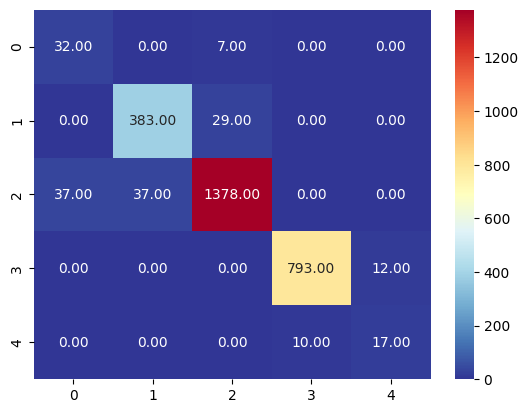

In [165]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='RdYlBu_r',annot=True,fmt='0.2f')
plt.show()

In [166]:
# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual Cost")
# plt.ylabel("Predicted Cost")
# plt.title("Actual vs Predicted Course Cost")
# plt.show()

**Dumping**

In [167]:
import joblib

# model
joblib.dump(best_model,'model.pkl')

# Encodes

joblib.dump(le,'le.pkl')
# joblib.dump(me2,'me2.pkl')
# joblib.dump(me3,'me3.pkl')
joblib.dump(oe1,'oe1.pkl')
joblib.dump(oe2,'oe2.pkl')
joblib.dump(oe3,'oe3.pkl')

#scaler
# joblib.dump(scaler,'scaler.pkl')


['oe3.pkl']